✅ Data Loaded: (284807, 31)
🔹 Using Sample Size: (56961, 31)
Before SMOTE:
 Class
0    56863
1       98
Name: count, dtype: int64

After SMOTE:
 Class
1    56863
0    56863
Name: count, dtype: int64

✅ Model Training Completed

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11503
           1       0.97      0.95      0.96     11243

    accuracy                           0.96     22746
   macro avg       0.96      0.96      0.96     22746
weighted avg       0.96      0.96      0.96     22746

F1-score: 0.9608
AUC-ROC: 0.9615


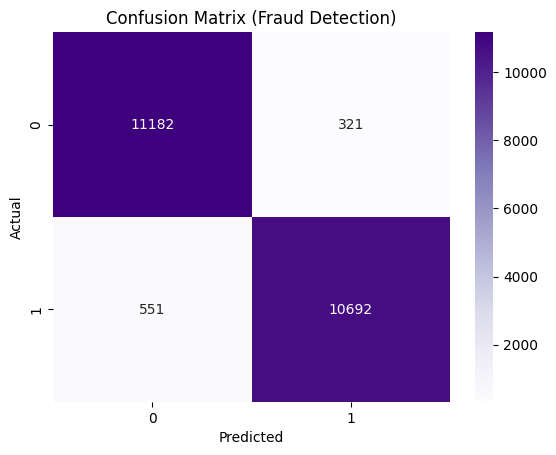


💾 Model saved as fraud_model_smote.pkl

✅ Fraud Detection (with SMOTE) Completed Successfully!


In [1]:
# =======================================
# ⚡ FAST FRAUD DETECTION SYSTEM (SMOTE)
# =======================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# =======================================
# Step 2: Load Dataset
# =======================================

data = pd.read_csv('C:\\Users\\PREMIUM\\OneDrive\\Desktop\\fraud_detection\\creditcard.csv\\creditcard.csv')
print("✅ Data Loaded:", data.shape)

# Use a smaller portion for faster processing
data_sample = data.sample(frac=0.2, random_state=42)
print("🔹 Using Sample Size:", data_sample.shape)

# =======================================
# Step 3: Preprocess Data
# =======================================

X = data_sample.drop('Class', axis=1)
y = data_sample['Class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =======================================
# Step 4: Handle Imbalance with SMOTE
# =======================================

print("Before SMOTE:\n", y.value_counts())

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:\n", y_res.value_counts())

# =======================================
# Step 5: Train-Test Split
# =======================================

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# =======================================
# Step 6: Train Fast Model (Logistic Regression)
# =======================================

model = LogisticRegression(max_iter=200, solver='liblinear')
model.fit(X_train, y_train)
print("\n✅ Model Training Completed")

# =======================================
# Step 7: Evaluate Model
# =======================================

y_pred = model.predict(X_test)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("F1-score:", round(f1_score(y_test, y_pred), 4))
print("AUC-ROC:", round(roc_auc_score(y_test, y_pred), 4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (Fraud Detection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =======================================
# Step 8: Save Model
# =======================================

import pickle
with open('fraud_model_smote.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\n💾 Model saved as fraud_model_smote.pkl")
print("\n✅ Fraud Detection (with SMOTE) Completed Successfully!")
